In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
lowess_input = pd.read_csv('Lowless_input.csv')
lowess_output = pd.read_csv('Lowless_output.csv') 

In [3]:
lowess_input = lowess_input.values
lowess_output = lowess_output.values

In [4]:
u = lowess_input.mean()
std = lowess_input.std()
lowess_input = (lowess_input - u)/std

In [5]:
print(lowess_input.shape, lowess_output.shape)

(99, 1) (99, 1)


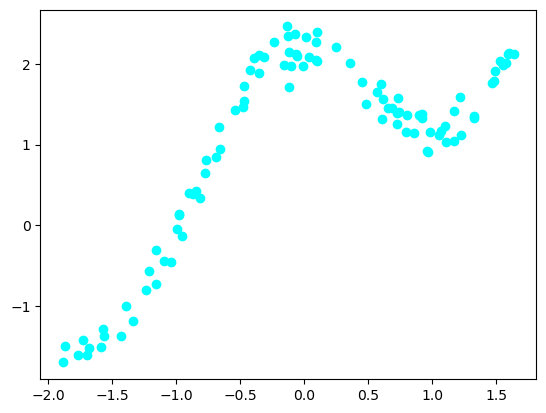

In [6]:
plt.scatter(lowess_input, lowess_output, c='aqua')

In [7]:
def weighted_func(query, X, tau):
    W = np.mat(np.eye(X.shape[0]))
    
    for i in range(X.shape[0]):
        W[i,i] = np.exp(np.dot((X[i] - query), (X[i] - query).T)/(-2*tau*tau))
        
    return W

In [8]:
def predict(X, Y, query_point, tau):
    
    ones = np.ones((X.shape[0], 1))
    
    X = np.hstack((X, ones))
    
    query_point = np.mat([query_point, 1])
    
    W = weighted_func(query_point, X, tau)
    
    theta_lowest = np.linalg.pinv(X.T*(W*X))*(X.T*(W*Y))
    
    prediction = np.dot(query_point, theta_lowest)
    
    return theta_lowest, prediction

In [9]:
theta, pred = predict(lowess_input, lowess_output, 1.0, 1)

In [10]:
print(theta, pred)

[[0.14069504]
 [1.45348191]] [[1.59417694]]


In [11]:
def plot_preds(X, Y, tau):
    X_test = np.linspace(-2, 1.5, 25)
    
    Y_test = []
    
    for i in X_test:
        theta, pred = predict(X, Y, i, tau)
        Y_test.append(pred[0][0])
    
    plt.scatter(X, Y, c='aqua')
    plt.scatter(X_test, Y_test, c='red', marker='*')

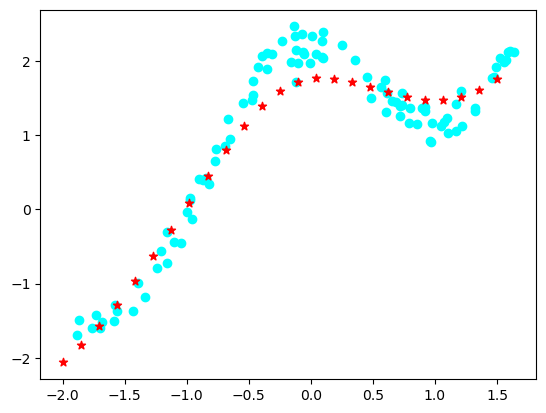

In [12]:
plot_preds(lowess_input, lowess_output, 0.5)

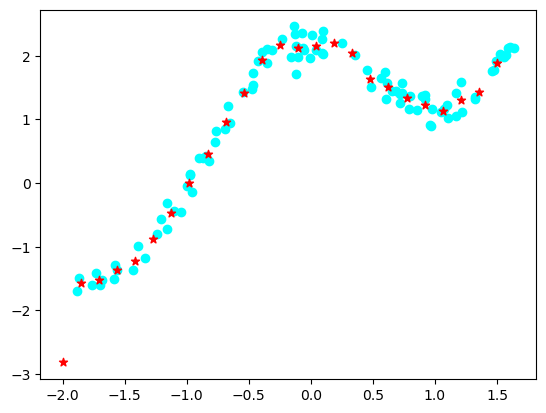

In [13]:
plot_preds(lowess_input, lowess_output, 0.05)

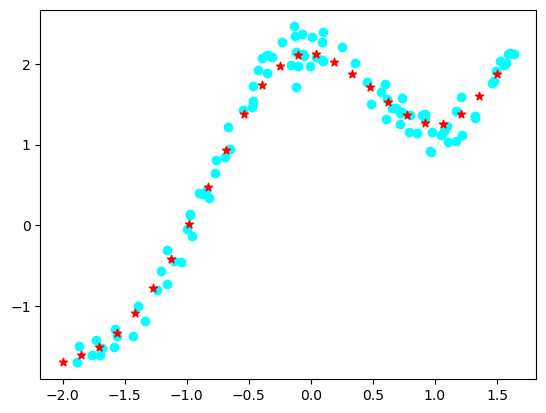

In [14]:
plot_preds(lowess_input, lowess_output, 0.2)

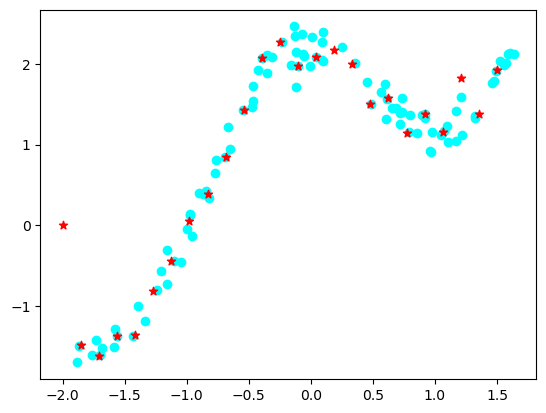

In [15]:
plot_preds(lowess_input, lowess_output, 0.002)

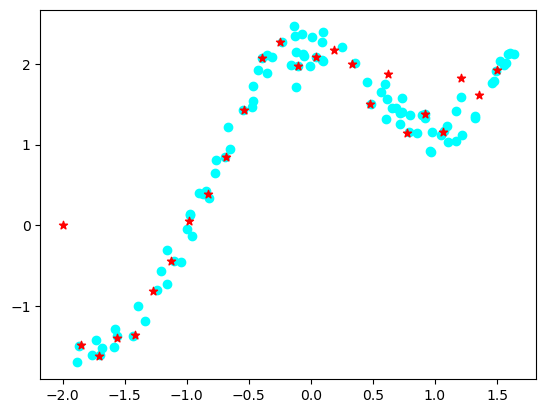

In [16]:
plot_preds(lowess_input, lowess_output, 0.0025)